In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('spotify dataset.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,14-06-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),13-12-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),05-07-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,19-07-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),05-03-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [4]:
# Check for null values
print(df.isnull().sum())

# Drop nulls or fill them if needed
df.dropna(inplace=True)

# Select numerical features for clustering
features = df.select_dtypes(include=[np.number])

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


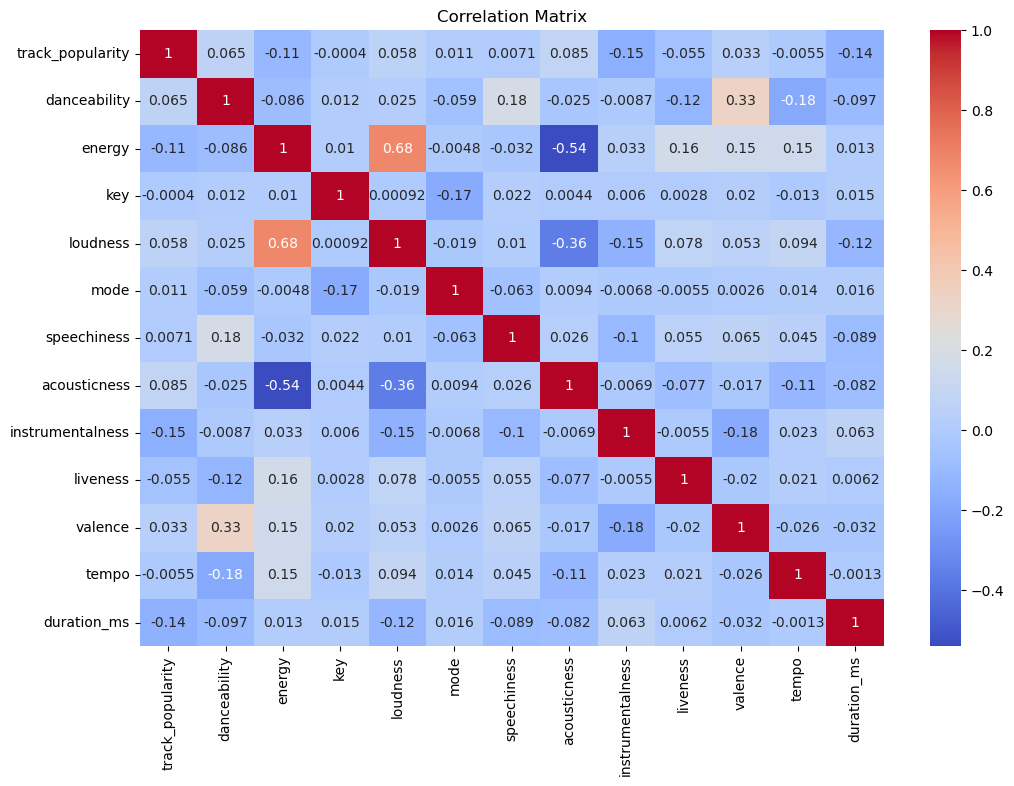

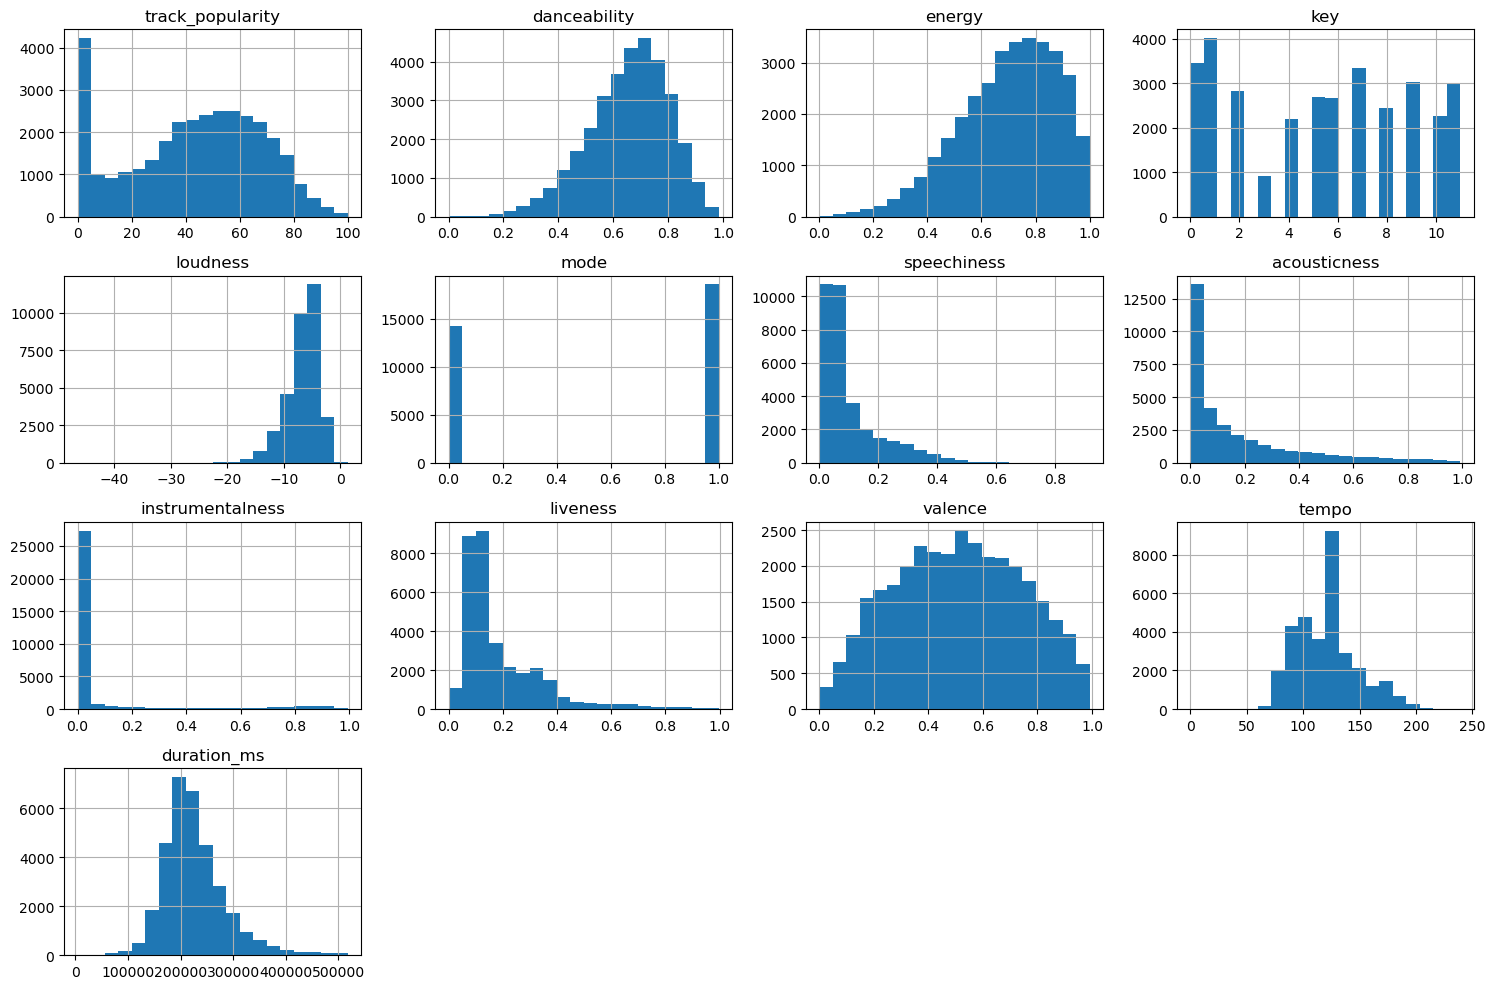

In [5]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(scaled_features, columns=features.columns).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Distribution plots
features.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

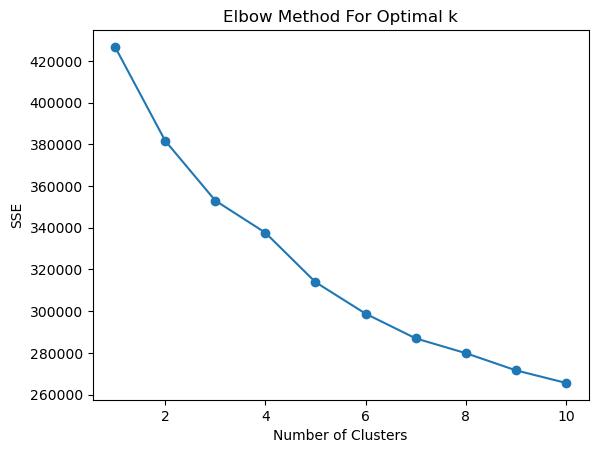

In [7]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

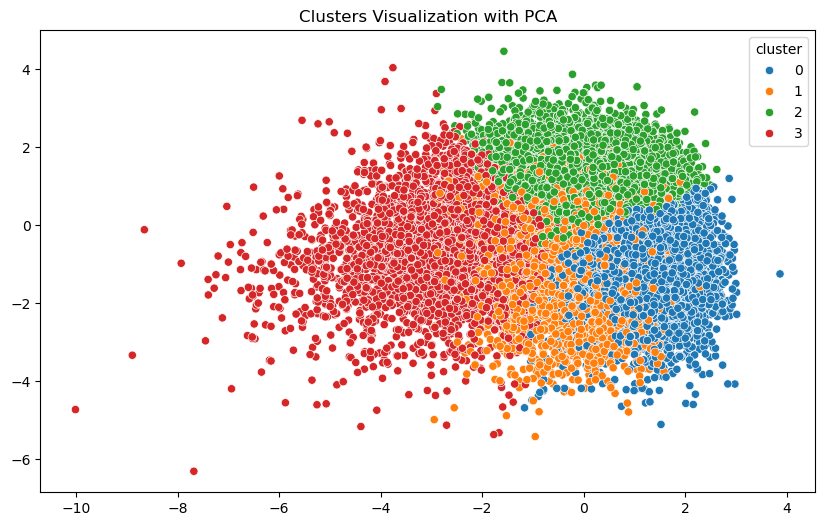

In [8]:
# Choose an optimal k (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# PCA for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['cluster'], palette='tab10')
plt.title('Clusters Visualization with PCA')
plt.show()

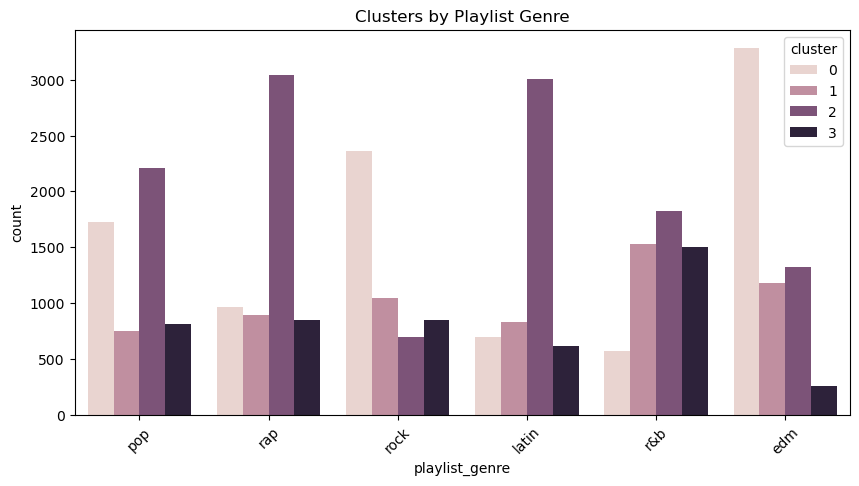

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 151 (\x97) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


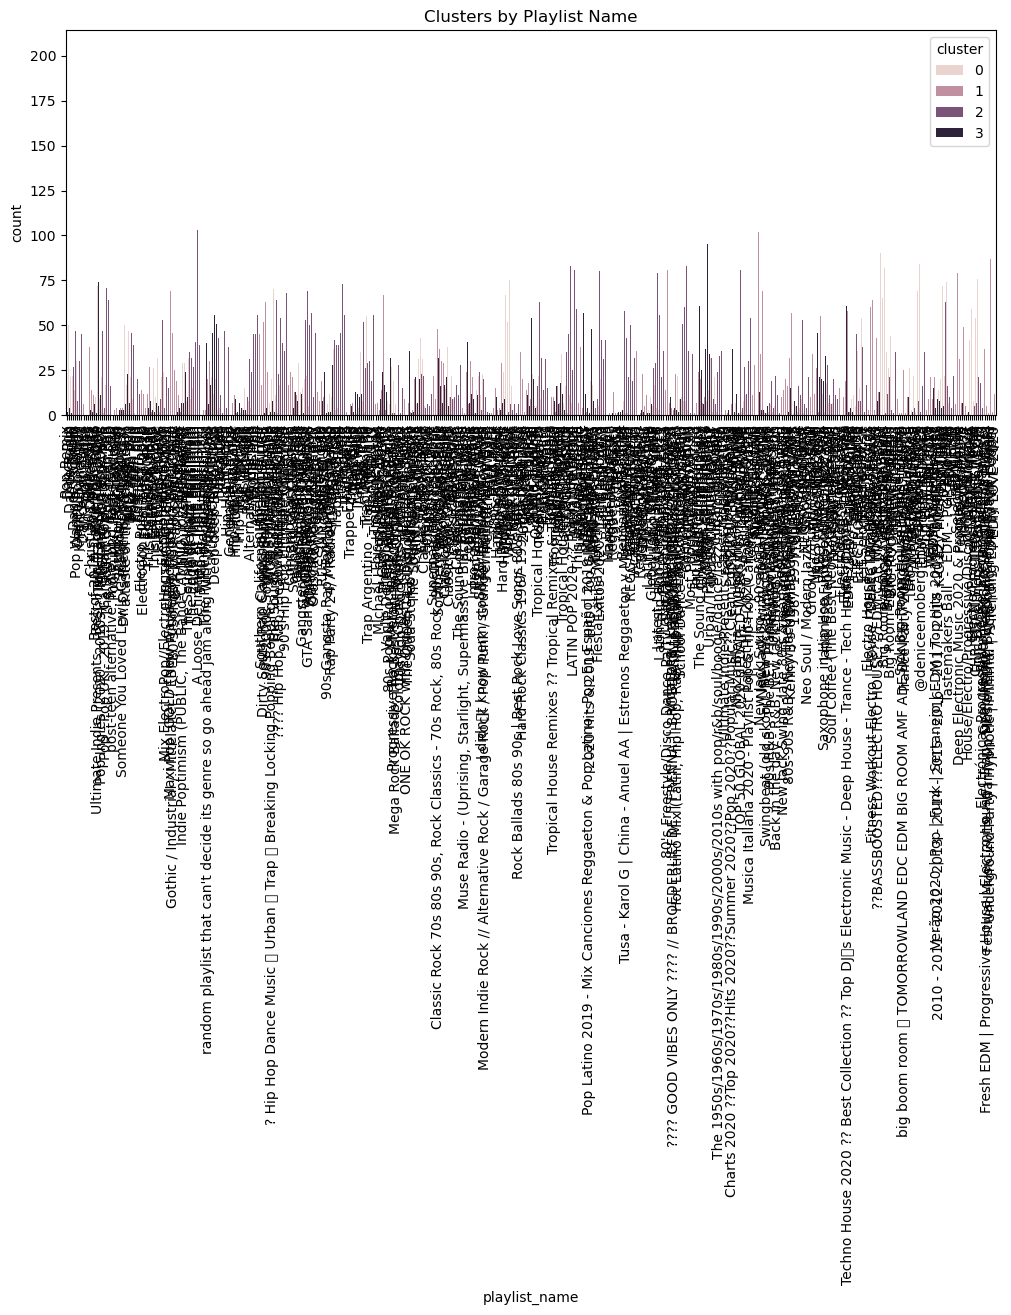

In [9]:
# Example: cluster count by genre (if 'playlist_genre' exists)
if 'playlist_genre' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x='playlist_genre', hue='cluster')
    plt.title("Clusters by Playlist Genre")
    plt.xticks(rotation=45)
    plt.show()

# Example: cluster count by playlist name (if 'playlist_name' exists)
if 'playlist_name' in df.columns:
    plt.figure(figsize=(12, 5))
    sns.countplot(data=df, x='playlist_name', hue='cluster')
    plt.title("Clusters by Playlist Name")
    plt.xticks(rotation=90)
    plt.show()

In [10]:
print(df.columns)

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'cluster'],
      dtype='object')


In [11]:
def recommend_songs(song_name):
    if song_name not in df['track_name'].values:
        print("Song not found in dataset.")
        return
    
    cluster_id = df[df['track_name'] == song_name]['cluster'].values[0]

    # Update with the correct column name for artist
    recommendations = df[df['cluster'] == cluster_id][['track_name', 'artists']].sample(5)
    
    return recommendations


In [12]:
print(df.columns.tolist())

['track_id', 'track_name', 'track_artist', 'track_popularity', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'cluster']


In [13]:
def recommend_songs(song_name):
    # Check if the song exists in the dataset
    if song_name not in df['track_name'].values:
        print("Song not found in dataset.")
        return

    # Get the cluster ID of the input song
    cluster_id = df[df['track_name'] == song_name]['cluster'].values[0]

    # Recommend 5 random songs from the same cluster
    try:
        recommendations = df[df['cluster'] == cluster_id][['track_name', 'artists']].sample(5)
        return recommendations
    except KeyError:
        print("Column name error. Please check your column names again.")

In [14]:
recommend_songs("Shape of You")

Column name error. Please check your column names again.


In [15]:
df['track_name'].sample(10)

32818    Beam Me Up (Kill Mode) (Radio Edit)
28021           Crackin - Martin Garrix Edit
1596                            This Is Love
10372                                   Hard
7655                      Sending You A Kiss
31778            Vicious - Original Mix Edit
10920    New Rules - Alison Wonderland Remix
32468                 Strangers - Radio Edit
22567                                  Suede
30265                      How Do You Sleep?
Name: track_name, dtype: object

In [16]:
df.head()         # Shows the first 5 rows
df.sample(5)      # Shows 5 random rows

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
25797,4I0aqR9G7F6oUPqQXLxSdW,My Favorite Things,The Supremes,10,109y0mnkGZAYVQNdT0SN3q,A Motown Christmas,01-01-1999,Christmas Soul,6FZYc2BvF7tColxO8PBShV,r&b,...,-10.916,0,0.0311,0.07510,0.00000,0.2580,0.309,81.863,167600,3
31648,0QHgoeTQNQmyA1bNoUhZD3,Can't You See,Rick Wade,46,6Ce256upxpicVQuZCebMlo,Players Theme,08-03-2013,House/Electro/Progressive/Disco/Lofi/Synthwave,42jbIN5Zj0UUPdtmqxQRKF,edm,...,-9.391,1,0.0861,0.00295,0.01240,0.0858,0.678,118.126,305307,1
10687,0K0soSt52EhMS9FohRObdK,Cómo Le Digo,Khea,66,4r9ruIPQRfmUwN2YwqUN0c,Cómo Le Digo,10-04-2018,Trap Rewind,37i9dQZF1DX0JcH25923HT,rap,...,-8.444,1,0.0817,0.18100,0.00000,0.2360,0.190,129.958,226101,3
4030,2Th9BGKvfZG8bKQSACitwG,It's Strange (feat. K.Flay),Louis The Child,51,14qZ1kKG6UoQnBupQTtYRq,It's Strange (feat. K.Flay),22-10-2015,POPTIMISM,6lWMi4lPiiPwDqn8ZpeyAY,pop,...,-7.792,1,0.3540,0.37100,0.04010,0.1020,0.417,85.951,245581,2
11377,6PwbCWiHXgYuN9NZl6Tkn7,Do It Again,???????,27,6HM0SPu1eIv721SbsO8l3o,River's Island,21-03-1984,City Pop 1985 ???????,3j2osvmecEao5nmo9jZ5df,rock,...,-5.291,0,0.0397,0.32400,0.00484,0.1140,0.803,122.821,275000,1
